![](images/portada-pokemon.jpg)

![](https://import.cdn.thinkific.com/220744/BExaQBPPQairRWFqxFbK_logo_mastermind_web_png)

# Proyecto Pokemon
Hemos llegado a nuestro despacho y nos ha llegado el primer pedido de nuestro cliente. Lo quiere saber todo sobre pokémon, y nos ha lanzado 7 preguntas que necesita contestar lo antes posible:

- Cual es el tipo de pokémon más comun?
- Cuántos pokemon legendarios hay en cada generación?
- Su poder cambia generación tras generacion?
- Cuál es el tipo de Pokémon más poderoso?
- Cuales son los más grandes? y pesados? y los más densos?
- Cuántos son machos? y cuántos hembra?
- Cuántos pokémon tienen más ataque que defensa? Y viceversa?
Antes de saber lo que Lo primero que haremos será definir qué debemos hacer para responder a las preguntas que tenemos sobre nuestros pokémon. Como decíamos, la típica estructura de un proyecto de estas características se compone de estos pasos:

1- Conseguir y importar los datos
2- Limpieza y manipulación de datos
3- Análisis visual exploratorio (o sea, resolver las preguntas que tenemos con técnicas visuales, lo que en inglés se entiende como EDA (Exploratory Data Analysis)

# Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as Req
from zipfile import ZipFile
import plotly.graph_objects as go
import plotly.express as px

# Establecer apariencia general de los gráficos

In [2]:
!pip install ipympl==0.9.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
%run "template_visualitation.ipynb"

# Consiguiendo los datos

## Pokémon de generaciones anteriores

Automatizar en este caso el proceso de descargar nuestros datos de pokemon desde un link, guardarlo en el formato zip que viene, y importarlo como un dataframe directamente desde Python. Lo haremos porque en esta clase de proyectos, todo lo que podamos automatizar ayudará a que se pueda replicar en otros entornos. Además, si nos acostumbramos a hacer este tipo de acciones en código, seremos mucho mas ágiles en el futuro.

Para hacer esto, vamos a planear los pasos que tendremos que realizar para poder conseguir nuestro archivo:

    - Conseguir el link de descarga del archivo .zip
    - Descargar el archivo a nuestro pc
    - Descomprimir el archivo zip
    - Construir dataframe
    

## Conseguir  el link de decarga

Link de donde proviene el dataset:

https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420

In [4]:
url = r'https://import.cdn.thinkific.com/220744/courses/1648061/pokemon_dataset-220322-181028.zip'

## Descarga el archivo

Para descargar el archivo, usaremos una librería de **Python** llamada _URLLIB_, encargada de toda la gestión de direcciones de internet, como abrir webs, descargar archivos por protocolo HTTP, etc. De este módulo, importaremos la sección request.

In [5]:
Req.urlretrieve(url, r'pokemon_dataset.zip')

('pokemon_dataset.zip', <http.client.HTTPMessage at 0x7f4da7727b80>)

## Descomprimir el archivo

Una vez descargado nuestro archivo zip, vamos a descomprimirlo, como hacemos en nuestro escritorio. La diferencia es que en este caso, todo el contenido de nuestro archivo lo guardaremos en una variable, directamente en nuestra memoria RAM, por lo que no veremos este archivo descomprimido en nuestra carpeta. Para los que os preguntéis si se puede descomprimir en el escritorio: si, se puede. Pero en este caso estaríamos duplicando espacio en nuestro disco innecesariamente, a sí que lo haremos de esta manera. Para descomprimir nuestro archivo, usaremos la librería ZIPFILE, que ya la tenemos instalada en nuestro sistema.

In [6]:
pokemon_zip = ZipFile(r'pokemon_dataset.zip')

In [7]:
pokemon_zip.filelist

[<ZipInfo filename='pokedex_mastermind.csv' compress_type=deflate filemode='-rw-r--r--' file_size=163483 compress_size=35537>]

In [8]:
archivo = pokemon_zip.open('pokedex_mastermind.csv')

### Construir DataFrame 

In [9]:
df = pd.read_csv(archivo, 
                 index_col=[0])

In [10]:
df

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,8,Sub Legendary,ICE,NaN,2.2,1763.696000,100,145,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,897,Spectrier,8,Sub Legendary,GHOST,NaN,2.0,98.105590,100,65,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,898,Calyrex,8,Legendary,PSYCHIC,Grass,1.1,16.975574,100,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,898,Calyrex Ice Rider,8,Legendary,PSYCHIC,Ice,2.4,1783.758042,100,165,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [11]:
df['name'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0                   Bulbasaur
1                     Ivysaur
2                    Venusaur
3       VenusaurMega Venusaur
4                  Charmander
                ...          
1040                Glastrier
1041                Spectrier
1042                  Calyrex
1043        Calyrex Ice Rider
1044     Calyrex Shadow Rider
Name: name, Length: 1045, dtype: object>

# Limpieza y manipulacion de datos

## Identificando problemas

Lo primero que haremos será una una pequeña exploración para identificar posibles problemas que podamos tener y empezar a limpiar nuestro dataset. Para encontrar los errores que comentabamos al inicio del capítulo, usaremos las funciones de Pandas que nos ayudan a tener una mejor comprensión sobre qué contiene nuestro dataset. Pero antes, vamos a repasar cuáles eran estos pasos:

1 - Quitar duplicados o datos irrelevante  
2 - Arreglar errores estructurales  
3 - Filtrar outliers, o datos atípicos  
4 - Lidiar con datos vacíos  
5 - Validar si los datos nos sirven  

## Quitar Datos duplicados

En este caso no tenemos este problema. Pero cómo podemos verificarlo? Usaremos una función de Pandas específica para ello, el método `df.duplicated()`

In [12]:
df.duplicated().any()

False

In [13]:
df.duplicated().unique()

array([False])

In [14]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_pounds', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

## Arreglar  errores estructurales

Para fijarnos si tenemos problemas en los nombres, tipos de datos, o problemas en sus formatos, usaremos la función `head, tail y sample`, para hacernos una idea de nuestro dataframe:

In [15]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [16]:
df.tail()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1040,896,Glastrier,8,Sub Legendary,ICE,NaN,2.2,1763.696000,100,145,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,897,Spectrier,8,Sub Legendary,GHOST,NaN,2.0,98.105590,100,65,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,898,Calyrex,8,Legendary,PSYCHIC,Grass,1.1,16.975574,100,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,898,Calyrex Ice Rider,8,Legendary,PSYCHIC,Ice,2.4,1783.758042,100,165,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1044,898,Calyrex Shadow Rider,8,Legendary,PSYCHIC,Ghost,2.4,118.167632,100,85,...,1.0,1.0,0.5,1.0,1.0,4.0,1.0,4.0,1.0,1.0


In [17]:
df.sample(5)

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
311,257,Blaziken,3,Normal,FIRE,Fighting,1.9,114.64024,80,120,...,2.0,2.0,2.0,0.25,1.0,1.0,1.0,0.5,0.5,1.0
174,135,Jolteon,1,Normal,ELECTRIC,NaN,0.8,54.01319,65,65,...,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0
183,143,Snorlax,1,Normal,NORMAL,NaN,2.1,1014.12520,160,110,...,1.0,1.0,1.0,1.00,1.0,0.0,1.0,1.0,1.0,1.0
1029,888,Zacian Hero of Many Battles,8,Legendary,FAIRY,NaN,2.8,242.50820,92,130,...,1.0,1.0,1.0,0.50,1.0,1.0,0.0,0.5,2.0,1.0
795,681,Aegislash Blade Forme,6,Normal,STEEL,Ghost,1.7,116.84486,60,150,...,2.0,0.5,0.5,0.25,0.5,2.0,0.5,2.0,0.5,0.5


In [18]:
df[['defense', 'sp_attack',
    'sp_defense', 'speed', 'catch_rate', 'percentage_male',
    'against_normal', 'against_fire', 'against_water', 'against_electric',
    'against_grass', 'against_ice', 'against_fight', 'against_poison']].head()

,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison
0,49,65,65,45,45.0,87.5%,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0
1,63,80,80,60,45.0,87.5%,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0
2,83,100,100,80,45.0,87.5%,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0
3,123,122,120,80,45.0,87.5%,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0
4,43,60,50,65,45.0,87.5%,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0


##### No podemos ver todas las columnas de golpe, cosa que dificulta la identificación de estos problemas

Vamos a echar un vistazo a cuántas columnas vemos y cuántas tenemos en realidad en nuestro dataframe:

In [19]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_pounds', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

Vemos que hay muchas columnas del tipo 'against', que describen cuan fuerte es ese pokémon contra el tipo que indica cada columna. Ya que son columnas similares, y el Pokémon en si lo podemos identificar por su posición en el índice del Dataframe, podemos construir un DataFrame sólo con estas columnas. Le llamaremos weakness, o sea, debilidad. Además, cambiaremos el nombre de las columnas y le quitaremos el 'against_' para dejar únicamente el tipo contra el que es debil, ya que más lo usaremos, y es más conveniente tenerlo así.

In [20]:
weakness = df[['against_normal', 'against_fire', 'against_water', 'against_electric',
               'against_grass', 'against_ice', 'against_fight', 'against_poison',
               'against_ground', 'against_flying', 'against_psychic', 'against_bug',
               'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
               'against_steel', 'against_fairy']]

cols = ['against_normal', 'against_fire', 'against_water', 'against_electric',
        'against_grass', 'against_ice', 'against_fight', 'against_poison',
        'against_ground', 'against_flying', 'against_psychic', 'against_bug',
        'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
        'against_steel', 'against_fairy']

In [21]:
weakness.columns

Index(['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

Para ello, iteraremos sobre los nombres de las columnas y reemplazaremos el 'against_' por un string vacío, usando list comprehension

In [22]:
weakness.columns = [x.replace('against_', '') for x in weakness.columns]

In [23]:
weakness.head()

,normal,fire,water,electric,grass,ice,fight,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [24]:
df.drop(cols, axis=1, inplace=True)

In [25]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,49,65,65,45,45.0,87.5%
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,63,80,80,60,45.0,87.5%
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,83,100,100,80,45.0,87.5%
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,123,122,120,80,45.0,87.5%
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,43,60,50,65,45.0,87.5%


* Megavenusaur tiene el nombre mal
* Quitar simbolo de % en percentage_male, esto lo vuelve un str y no un float o int

### todas las variables de texto que no sean nombres propios en minuscula

Habitualmente, en programación hay unas reglas no escritas para mantener la cohesión de nuestros datos. Ya sea para asignar nombres a nuestras variables, funciones, clases, etc

In [26]:
df.select_dtypes(include=[object])

,name,status,type_1,type_2,percentage_male
0,Bulbasaur,Normal,GRASS,Poison,87.5%
1,Ivysaur,Normal,GRASS,Poison,87.5%
2,Venusaur,Normal,GRASS,Poison,87.5%
3,VenusaurMega Venusaur,Normal,GRASS,Poison,87.5%
4,Charmander,Normal,FIRE,NaN,87.5%
...,...,...,...,...,...
1040,Glastrier,Sub Legendary,ICE,NaN,0.0%
1041,Spectrier,Sub Legendary,GHOST,NaN,0.0%
1042,Calyrex,Legendary,PSYCHIC,Grass,0.0%
1043,Calyrex Ice Rider,Legendary,PSYCHIC,Ice,0.0%


Ya que la columna name se refiere a los nombres propios de los pokémon, no es necesario ponerlo en minúsculas, por lo que usaremos el resto de columnas.

In [27]:
df.select_dtypes(include=[object]).columns

Index(['name', 'status', 'type_1', 'type_2', 'percentage_male'], dtype='object')

In [28]:
cols = ['status', 'type_1', 'type_2']

In [29]:
# df['status'].str.lower() Se puede realizar esta linea de codigo por array pero no a varias columnas

In [30]:
df[cols] = df[cols].apply(lambda x: x.str.lower())

In [31]:
df.select_dtypes(include=[object])

,name,status,type_1,type_2,percentage_male
0,Bulbasaur,normal,grass,poison,87.5%
1,Ivysaur,normal,grass,poison,87.5%
2,Venusaur,normal,grass,poison,87.5%
3,VenusaurMega Venusaur,normal,grass,poison,87.5%
4,Charmander,normal,fire,NaN,87.5%
...,...,...,...,...,...
1040,Glastrier,sub legendary,ice,NaN,0.0%
1041,Spectrier,sub legendary,ghost,NaN,0.0%
1042,Calyrex,legendary,psychic,grass,0.0%
1043,Calyrex Ice Rider,legendary,psychic,ice,0.0%


### Quitar simbolo de % en percentage_male, esto lo vuelve un str y no un float o int

In [32]:
df['percentage_male'].unique()

array(['87.5%', '50.0%', '0.0%', '100.0%', '25.0%', '75.0%'], dtype=object)

In [33]:
df['percentage_male'] = df['percentage_male'].str.replace('%', '').apply(float)

In [34]:
df['percentage_male'].unique()

array([ 87.5,  50. ,   0. , 100. ,  25. ,  75. ])

### weight_pounds de lb a kg

In [35]:
df['weight_kg'] = df['weight_pounds'] * 0.453592

In [36]:
df['weight_kg']

0         6.899986
1        12.999974
2        99.999800
3       155.499688
4         8.499983
           ...    
1040    799.998396
1041     44.499911
1042      7.699985
1043    809.098378
1044     53.599893
Name: weight_kg, Length: 1045, dtype: float64

In [37]:
df['weight_kg'] = df['weight_kg'].round(2)

In [38]:
df['weight_kg']

0         6.9
1        13.0
2       100.0
3       155.5
4         8.5
        ...  
1040    800.0
1041     44.5
1042      7.7
1043    809.1
1044     53.6
Name: weight_kg, Length: 1045, dtype: float64

In [39]:
df['weight_pounds'] = df['weight_kg']

In [40]:
df

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,normal,grass,poison,0.7,6.9,45,49,49,65,65,45,45.0,87.5,6.9
1,2,Ivysaur,1,normal,grass,poison,1.0,13.0,60,62,63,80,80,60,45.0,87.5,13.0
2,3,Venusaur,1,normal,grass,poison,2.0,100.0,80,82,83,100,100,80,45.0,87.5,100.0
3,3,VenusaurMega Venusaur,1,normal,grass,poison,2.4,155.5,80,100,123,122,120,80,45.0,87.5,155.5
4,4,Charmander,1,normal,fire,NaN,0.6,8.5,39,52,43,60,50,65,45.0,87.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,8,sub legendary,ice,NaN,2.2,800.0,100,145,130,65,110,30,3.0,0.0,800.0
1041,897,Spectrier,8,sub legendary,ghost,NaN,2.0,44.5,100,65,60,145,80,130,3.0,0.0,44.5
1042,898,Calyrex,8,legendary,psychic,grass,1.1,7.7,100,80,80,80,80,80,3.0,0.0,7.7
1043,898,Calyrex Ice Rider,8,legendary,psychic,ice,2.4,809.1,100,165,150,85,130,50,3.0,0.0,809.1


In [41]:
df.drop('weight_kg', 
        axis=1, 
        inplace=True)

In [42]:
df.rename(columns={'weight_pounds':'weight_kg'}, inplace=True)

### Los pokemon mega tienen el nombre mal

In [43]:
df

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
0,1,Bulbasaur,1,normal,grass,poison,0.7,6.9,45,49,49,65,65,45,45.0,87.5
1,2,Ivysaur,1,normal,grass,poison,1.0,13.0,60,62,63,80,80,60,45.0,87.5
2,3,Venusaur,1,normal,grass,poison,2.0,100.0,80,82,83,100,100,80,45.0,87.5
3,3,VenusaurMega Venusaur,1,normal,grass,poison,2.4,155.5,80,100,123,122,120,80,45.0,87.5
4,4,Charmander,1,normal,fire,NaN,0.6,8.5,39,52,43,60,50,65,45.0,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,8,sub legendary,ice,NaN,2.2,800.0,100,145,130,65,110,30,3.0,0.0
1041,897,Spectrier,8,sub legendary,ghost,NaN,2.0,44.5,100,65,60,145,80,130,3.0,0.0
1042,898,Calyrex,8,legendary,psychic,grass,1.1,7.7,100,80,80,80,80,80,3.0,0.0
1043,898,Calyrex Ice Rider,8,legendary,psychic,ice,2.4,809.1,100,165,150,85,130,50,3.0,0.0


Mirando una muestra de los nombres, hemos visto que parece que tienen problema los pokémon Mega, vamos a comprobarlo:

In [44]:
df['name'][:50]

0                       Bulbasaur
1                         Ivysaur
2                        Venusaur
3           VenusaurMega Venusaur
4                      Charmander
5                      Charmeleon
6                       Charizard
7     Charizard XMega Charizard X
8     Charizard YMega Charizard Y
9                        Squirtle
10                      Wartortle
11                      Blastoise
12        BlastoiseMega Blastoise
13                       Caterpie
14                        Metapod
15                     Butterfree
16                         Weedle
17                         Kakuna
18                       Beedrill
19          BeedrillMega Beedrill
20                         Pidgey
21                      Pidgeotto
22                        Pidgeot
23            PidgeotMega Pidgeot
24                        Rattata
25                 Alolan Rattata
26                       Raticate
27                Alolan Raticate
28                        Spearow
29            

In [45]:
df['name'].str.contains('Mega')

0       False
1       False
2       False
3        True
4       False
        ...  
1040    False
1041    False
1042    False
1043    False
1044    False
Name: name, Length: 1045, dtype: bool

In [46]:
df[df['name'].str.contains('Mega')]

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
3,3,VenusaurMega Venusaur,1,normal,grass,poison,2.4,155.5,80,100,123,122,120,80,45.0,87.5
7,6,Charizard XMega Charizard X,1,normal,fire,dragon,1.7,110.5,78,130,111,130,85,100,45.0,87.5
8,6,Charizard YMega Charizard Y,1,normal,fire,flying,1.7,100.5,78,104,78,159,115,100,45.0,87.5
12,9,BlastoiseMega Blastoise,1,normal,water,NaN,1.6,101.1,79,103,120,135,115,78,45.0,87.5
19,15,BeedrillMega Beedrill,1,normal,bug,poison,1.4,40.5,65,150,40,15,80,145,45.0,50.0
23,18,PidgeotMega Pidgeot,1,normal,normal,flying,2.2,50.5,83,80,80,135,80,121,45.0,50.0
84,65,AlakazamMega Alakazam,1,normal,psychic,NaN,1.2,48.0,55,50,65,175,105,150,50.0,75.0
106,80,SlowbroMega Slowbro,1,normal,water,psychic,2.0,120.0,95,75,180,130,80,30,75.0,50.0
125,94,GengarMega Gengar,1,normal,ghost,poison,1.4,40.5,60,65,80,170,95,130,45.0,50.0
150,115,KangaskhanMega Kangaskhan,1,normal,normal,NaN,2.2,100.0,105,125,100,60,100,100,45.0,0.0


In [47]:
df[df['name'].str.contains('Mega')]['name']

3            VenusaurMega Venusaur
7      Charizard XMega Charizard X
8      Charizard YMega Charizard Y
12         BlastoiseMega Blastoise
19           BeedrillMega Beedrill
23             PidgeotMega Pidgeot
84           AlakazamMega Alakazam
106            SlowbroMega Slowbro
125              GengarMega Gengar
150      KangaskhanMega Kangaskhan
164              PinsirMega Pinsir
168          GyaradosMega Gyarados
182      AerodactylMega Aerodactyl
194          Mewtwo XMega Mewtwo X
195          Mewtwo YMega Mewtwo Y
199                       Meganium
227          AmpharosMega Ampharos
256            SteelixMega Steelix
261              ScizorMega Scizor
264        HeracrossMega Heracross
281          HoundoomMega Houndoom
301        TyranitarMega Tyranitar
308          SceptileMega Sceptile
312          BlazikenMega Blaziken
316          SwampertMega Swampert
341        GardevoirMega Gardevoir
362            SableyeMega Sableye
364              MawileMega Mawile
368              Agg

Modificarlos manualmente no es una opción, nos volveríamos locos. Para ello tendríamos que buscar una herramienta que nos permita modificar los strings con alguna regla, ya que vemos que el problema de estos strings es que está el nombre del pokémon pegado antes que la palabra Mega. A sí que sigue un patrón, podemos arreglarlo.

Para esta clase de problemas, existe como un pequeño lenguaje (o mejor dicho, herramienta) llamado Regular Expressions, y es más conocido como Regex. Esta herramienta nos permite localizar patrones en strings, ya no sólo en Python, sinó en cualquier otro lenguaje de programación. Reconocer estos patrones tiene muchísimas utilidades en el campo de la programación, como por ejemplo, yo que se, validar el formato de miles de direcciones de email, o números de teléfono, etc.

In [48]:
len(df[df['name'].str.contains('Mega')]['name'])

49

In [49]:
nombres = df[df['name'].str.contains('Mega')]['name']

In [50]:
nombres[3]

'VenusaurMega Venusaur'

In [51]:
pat = '^.*(?=(Mega))'

In [52]:
nombres.str.replace(pat, '', regex=True)

3         Mega Venusaur
7      Mega Charizard X
8      Mega Charizard Y
12       Mega Blastoise
19        Mega Beedrill
23         Mega Pidgeot
84        Mega Alakazam
106        Mega Slowbro
125         Mega Gengar
150     Mega Kangaskhan
164         Mega Pinsir
168       Mega Gyarados
182     Mega Aerodactyl
194       Mega Mewtwo X
195       Mega Mewtwo Y
199            Meganium
227       Mega Ampharos
256        Mega Steelix
261         Mega Scizor
264      Mega Heracross
281       Mega Houndoom
301      Mega Tyranitar
308       Mega Sceptile
312       Mega Blaziken
316       Mega Swampert
341      Mega Gardevoir
362        Mega Sableye
364         Mega Mawile
368         Mega Aggron
371       Mega Medicham
374      Mega Manectric
384       Mega Sharpedo
389       Mega Camerupt
401        Mega Altaria
425        Mega Banette
431          Mega Absol
435         Mega Glalie
447      Mega Salamence
451      Mega Metagross
456         Mega Latias
458         Mega Latios
464       Mega R

In [53]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
0,1,Bulbasaur,1,normal,grass,poison,0.7,6.9,45,49,49,65,65,45,45.0,87.5
1,2,Ivysaur,1,normal,grass,poison,1.0,13.0,60,62,63,80,80,60,45.0,87.5
2,3,Venusaur,1,normal,grass,poison,2.0,100.0,80,82,83,100,100,80,45.0,87.5
3,3,VenusaurMega Venusaur,1,normal,grass,poison,2.4,155.5,80,100,123,122,120,80,45.0,87.5
4,4,Charmander,1,normal,fire,NaN,0.6,8.5,39,52,43,60,50,65,45.0,87.5


In [54]:
df['name'].str.replace(pat, '', regex=True)

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3              Mega Venusaur
4                 Charmander
                ...         
1040               Glastrier
1041               Spectrier
1042                 Calyrex
1043       Calyrex Ice Rider
1044    Calyrex Shadow Rider
Name: name, Length: 1045, dtype: object

In [55]:
df['name'] = df['name'].str.replace(pat, '', regex=True)

In [56]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
0,1,Bulbasaur,1,normal,grass,poison,0.7,6.9,45,49,49,65,65,45,45.0,87.5
1,2,Ivysaur,1,normal,grass,poison,1.0,13.0,60,62,63,80,80,60,45.0,87.5
2,3,Venusaur,1,normal,grass,poison,2.0,100.0,80,82,83,100,100,80,45.0,87.5
3,3,Mega Venusaur,1,normal,grass,poison,2.4,155.5,80,100,123,122,120,80,45.0,87.5
4,4,Charmander,1,normal,fire,NaN,0.6,8.5,39,52,43,60,50,65,45.0,87.5


## Filtrar Outliers o valores atipicos

En este caso no será necesario que filtremos estos outliers, ya que no haremos un estudio estadístico como tal, pero sí que es interesante saber identificarlos, y lo haremos con una sencilla funcion que ya habíamos visto en el capítulo de Pandas, llamada df.describe(). Además, nos ayudará a conocer otras cosas sobre las propiedades de nuestros pokémon.

In [57]:
df.describe()

,pokedex_number,generation,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
count,1045.000000,1045.000000,1045.000000,1044.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1027.000000,1045.000000
mean,440.769378,4.098565,1.374067,71.216571,70.067943,80.476555,74.670813,73.031579,72.298565,68.807656,92.739046,45.789474
std,262.517231,2.272788,3.353349,132.259911,26.671411,32.432728,31.259462,32.745857,28.098943,30.210094,75.878404,27.631585
min,1.000000,1.000000,0.100000,0.100000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000
25%,212.000000,2.000000,0.600000,9.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,50.000000
50%,436.000000,4.000000,1.000000,29.500000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,60.000000,50.000000
75%,670.000000,6.000000,1.600000,70.500000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,50.000000
max,898.000000,8.000000,100.000000,999.900000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,255.000000,100.000000


## Lidiar con NaNs

Muchos algoritmos de machine learning no pueden trabajar con valores vacíos, o valores NAN. Como usaremos alguno más tarde, vamos a solucionar esto, y la manera más rápida de saber si tenemos esta clase de valores en nuestro dataframe es con la función isna()

In [58]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
0,1,Bulbasaur,1,normal,grass,poison,0.7,6.9,45,49,49,65,65,45,45.0,87.5
1,2,Ivysaur,1,normal,grass,poison,1.0,13.0,60,62,63,80,80,60,45.0,87.5
2,3,Venusaur,1,normal,grass,poison,2.0,100.0,80,82,83,100,100,80,45.0,87.5
3,3,Mega Venusaur,1,normal,grass,poison,2.4,155.5,80,100,123,122,120,80,45.0,87.5
4,4,Charmander,1,normal,fire,NaN,0.6,8.5,39,52,43,60,50,65,45.0,87.5


In [59]:
df.isna()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1041,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1042,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1043,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
df.isna().any()

pokedex_number     False
name               False
generation         False
status             False
type_1             False
type_2              True
height_m           False
weight_kg           True
hp                 False
attack             False
defense            False
sp_attack          False
sp_defense         False
speed              False
catch_rate          True
percentage_male    False
dtype: bool

In [61]:
df['type_2'].isna()

0       False
1       False
2       False
3       False
4        True
        ...  
1040     True
1041     True
1042    False
1043    False
1044    False
Name: type_2, Length: 1045, dtype: bool

In [62]:
df[df['type_2'].isna()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
4,4,Charmander,1,normal,fire,NaN,0.6,8.5,39,52,43,60,50,65,45.0,87.5
5,5,Charmeleon,1,normal,fire,NaN,1.1,19.0,58,64,58,80,65,80,45.0,87.5
9,7,Squirtle,1,normal,water,NaN,0.5,9.0,44,48,65,50,64,43,45.0,87.5
10,8,Wartortle,1,normal,water,NaN,1.0,22.5,59,63,80,65,80,58,45.0,87.5
11,9,Blastoise,1,normal,water,NaN,1.6,85.5,79,83,100,85,105,78,45.0,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,891,Kubfu,8,sub legendary,fighting,NaN,0.6,12.0,60,90,60,53,50,72,3.0,87.5
1038,894,Regieleki,8,sub legendary,electric,NaN,1.2,145.0,80,100,50,100,50,200,3.0,0.0
1039,895,Regidrago,8,sub legendary,dragon,NaN,2.1,200.0,200,100,50,100,50,80,3.0,0.0
1040,896,Glastrier,8,sub legendary,ice,NaN,2.2,800.0,100,145,130,65,110,30,3.0,0.0


In [63]:
len(df[df['type_2'].isna()])

492

In [64]:
df['type_2'].unique()

array(['poison', nan, 'flying', 'dragon', 'normal', 'psychic', 'steel',
       'ground', 'fairy', 'grass', 'fighting', 'electric', 'ice', 'dark',
       'ghost', 'rock', 'water', 'fire', 'bug'], dtype=object)

In [65]:
df['type_2'].fillna('none', inplace=True)

In [66]:
df[df['catch_rate'].isna()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
69,52,Galarian Meowth,1,normal,steel,none,0.4,7.5,50,65,55,40,40,40,NaN,0.0
100,77,Galarian Ponyta,1,normal,psychic,none,0.8,24.0,50,85,55,65,65,90,NaN,0.0
102,78,Galarian Rapidash,1,normal,psychic,fairy,1.7,80.0,65,100,70,80,80,105,NaN,0.0
111,83,Galarian Farfetch'd,1,normal,fighting,none,0.8,42.0,52,95,55,58,62,55,NaN,0.0
144,110,Galarian Weezing,1,normal,poison,fairy,3.0,16.0,65,90,120,85,70,60,NaN,0.0
158,122,Galarian Mr. Mime,1,normal,psychic,ice,1.4,56.8,50,65,65,90,90,100,NaN,0.0
273,222,Galarian Corsola,2,normal,ghost,none,0.6,0.5,60,55,100,65,100,30,NaN,0.0
320,263,Galarian Zigzagoon,3,normal,dark,normal,0.4,17.5,38,30,41,30,41,60,NaN,0.0
322,264,Galarian Linoone,3,normal,dark,normal,0.5,32.5,78,70,61,50,61,100,NaN,0.0
654,554,Galarian Darumaka,5,normal,ice,none,0.7,40.0,70,90,45,15,45,50,NaN,0.0


Vemos que sobretodo los que son Galarian y algunos pokémon especiales no tienen datos sobre su indice de atrapabilidad. Lo ideal aquí es fijarse en otros atributos, como por ejemplo qué tipo de Pokémon son. Lo que haremos en este caso, es imputar, o sea generar estos datos de forma artificial, y vamos a hacerlo de la manera siguiente: Calcularemos la media del indice de atrapabilidad tienen todos los pokemon legendarios, y la aplicaremos a los que no disponen de este dato, y lo haremos también para los que no son legendarios. Esto permitirá que, aunque no sean datos 100% fiables, podrían acercarse más a la realidad. Además, no afectará a nuestras métricas cuando hagamos cálculos que impliquen este indice.

In [67]:
media_normales = df[df['status'] == 'normal']['catch_rate'].mean()
media_legendarios = df[df['status'] == 'legendary']['catch_rate'].mean()

In [68]:
df.describe()

,pokedex_number,generation,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
count,1045.000000,1045.000000,1045.000000,1044.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1027.000000,1045.000000
mean,440.769378,4.098565,1.374067,71.216571,70.067943,80.476555,74.670813,73.031579,72.298565,68.807656,92.739046,45.789474
std,262.517231,2.272788,3.353349,132.259911,26.671411,32.432728,31.259462,32.745857,28.098943,30.210094,75.878404,27.631585
min,1.000000,1.000000,0.100000,0.100000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000
25%,212.000000,2.000000,0.600000,9.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,50.000000
50%,436.000000,4.000000,1.000000,29.500000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,60.000000,50.000000
75%,670.000000,6.000000,1.600000,70.500000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,50.000000
max,898.000000,8.000000,100.000000,999.900000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,255.000000,100.000000


In [69]:
df.describe()['catch_rate']

count    1027.000000
mean       92.739046
std        75.878404
min         3.000000
25%        45.000000
50%        60.000000
75%       127.000000
max       255.000000
Name: catch_rate, dtype: float64

In [70]:
print(f'Media de atrapabilidad de Pokemon normales es {media_normales}')
print(f'Media de atrapabilidad de Pokemon legendarios es {media_legendarios}')

Media de atrapabilidad de Pokemon normales es 103.46400885935769
Media de atrapabilidad de Pokemon legendarios es 23.923076923076923


In [71]:
sin_datos = df['catch_rate'].isna()

son_legendarios = df['status'] == 'legendary'
son_normales = df['status'] == 'normal'

In [72]:
df.loc[sin_datos & son_legendarios, 'catch_rate'] = media_legendarios
df.loc[sin_datos & son_normales, 'catch_rate'] = media_normales

In [73]:
df['catch_rate'].isna().any()

False

In [74]:
df['catch_rate'] = df['catch_rate'].round(2)

In [75]:
df.isna().any()

pokedex_number     False
name               False
generation         False
status             False
type_1             False
type_2             False
height_m           False
weight_kg           True
hp                 False
attack             False
defense            False
sp_attack          False
sp_defense         False
speed              False
catch_rate         False
percentage_male    False
dtype: bool

In [76]:
df[df['weight_kg'].isna()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
1033,890,Eternatus Eternamax,8,legendary,poison,dragon,100.0,NaN,255,115,250,125,250,130,23.92,0.0


Pues hacemos un pequeño trabajo de investigación y buscamos este peso en internet, al ser sólo un valor:

In [77]:
peso = 950

In [78]:
pokemon = df['name'] == 'Eternatus Eternamax'

In [79]:
df.loc[pokemon, 'weight_kg'] = peso

In [80]:
df.loc[pokemon]

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
1033,890,Eternatus Eternamax,8,legendary,poison,dragon,100.0,950.0,255,115,250,125,250,130,23.92,0.0


In [81]:
df.isna().any()

pokedex_number     False
name               False
generation         False
status             False
type_1             False
type_2             False
height_m           False
weight_kg          False
hp                 False
attack             False
defense            False
sp_attack          False
sp_defense         False
speed              False
catch_rate         False
percentage_male    False
dtype: bool

## Validar nuestros datos

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1044
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   1045 non-null   int64  
 1   name             1045 non-null   object 
 2   generation       1045 non-null   int64  
 3   status           1045 non-null   object 
 4   type_1           1045 non-null   object 
 5   type_2           1045 non-null   object 
 6   height_m         1045 non-null   float64
 7   weight_kg        1045 non-null   float64
 8   hp               1045 non-null   int64  
 9   attack           1045 non-null   int64  
 10  defense          1045 non-null   int64  
 11  sp_attack        1045 non-null   int64  
 12  sp_defense       1045 non-null   int64  
 13  speed            1045 non-null   int64  
 14  catch_rate       1045 non-null   float64
 15  percentage_male  1045 non-null   float64
dtypes: float64(4), int64(8), object(4)
memory usage: 138.8+ KB


# EDA

## Cual es el tipo de Pokemon mas comun?

Vale, para responder a esta pregunta tenemos un argumento que lo hace:

In [83]:
df['type_1'].value_counts()

water       134
normal      115
grass        91
bug          81
psychic      81
fire         65
electric     62
rock         60
dark         46
ghost        42
fighting     42
dragon       41
ground       41
poison       41
ice          37
steel        36
fairy        22
flying        8
Name: type_1, dtype: int64

Nos devuelve un Series, donde el índice es el tipo 1 de pokemon y los valores contados y en orden. Ok, pero es esto suficiente? También tenemos un segundo tipo de pokémon, los de type_2 (explorar type_2), eso quiere decir que un pokémon no tiene sólo un tipo, sinó que tiene dos.

In [84]:
pd.pivot_table(df, 
               index='type_1')

,attack,catch_rate,defense,generation,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg
type_1,,,,,,,,,,,,
bug,71.074074,112.444444,71.802469,3.814815,0.896296,57.024691,46.141975,399.691358,56.382716,65.074074,63.259259,33.954321
dark,81.934783,95.367826,66.391304,4.478261,1.184783,70.065217,45.923913,476.260870,71.086957,68.369565,76.695652,58.034783
dragon,107.024390,31.756098,83.926829,4.609756,2.243902,85.243902,36.585366,549.219512,91.731707,84.097561,84.341463,127.109756
electric,74.983871,92.491290,66.241935,4.338710,0.969355,62.241935,37.701613,474.967742,89.548387,71.661290,86.758065,37.827419
fairy,68.090909,110.860000,70.545455,4.954545,0.927273,72.954545,31.818182,541.772727,78.954545,89.181818,59.545455,40.445455
fighting,102.928571,83.509048,73.666667,4.761905,1.319048,72.928571,58.035714,499.809524,57.333333,68.214286,71.333333,78.411905
fire,85.400000,71.692308,68.107692,3.892308,1.204615,69.430769,63.461538,401.923077,86.415385,71.292308,74.369231,65.020000
flying,75.125000,88.250000,64.375000,6.750000,1.112500,69.625000,62.500000,752.750000,73.875000,70.000000,87.000000,41.225000
ghost,73.976190,83.987143,79.952381,4.833333,1.230952,64.809524,40.476190,549.976190,83.476190,78.809524,63.047619,63.888095


In [85]:
pd.pivot_table(df, 
               index='type_1', 
               columns='type_2',
               values='name',
               aggfunc= lambda x: x.value_counts().count(),
               fill_value=0)

type_2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,none,normal,poison,psychic,rock,steel,water
type_1,,,,,,,,,,,,,,,,,,,
bug,0,0,0,4,2,4,2,14,1,6,2,0,19,0,12,2,3,7,3
dark,0,0,4,0,3,2,3,6,2,1,0,2,14,5,0,2,0,2,0
dragon,0,0,0,1,1,2,1,6,3,0,7,3,13,0,0,4,0,0,0
electric,0,2,2,0,2,0,1,6,1,1,0,2,34,2,3,1,0,4,1
fairy,0,0,0,0,0,0,0,2,0,0,0,0,19,0,0,0,0,1,0
fighting,0,2,0,0,0,0,0,2,1,0,0,1,29,0,0,3,0,3,1
fire,2,1,2,0,0,7,0,7,2,0,3,0,34,2,0,2,1,1,1
flying,0,0,2,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,1
ghost,0,1,2,0,1,0,3,3,0,11,2,0,15,0,4,0,0,0,0


Fijándonos en esta tabla, podemos saber exactamente cuántos pokemon, por cada combinación de tipos existen. Aunque esto tampoco es muy bonito de ver, y realmente se hace complicado hacerse una idea general de nuestra distribución por lo que vamos a emplear una visualización para que sea más fácil.

In [86]:
contar_tipos = pd.pivot_table(df, 
               index='type_1', 
               columns='type_2',
               values='name',
               aggfunc= lambda x: x.value_counts().count(),
               fill_value=0)

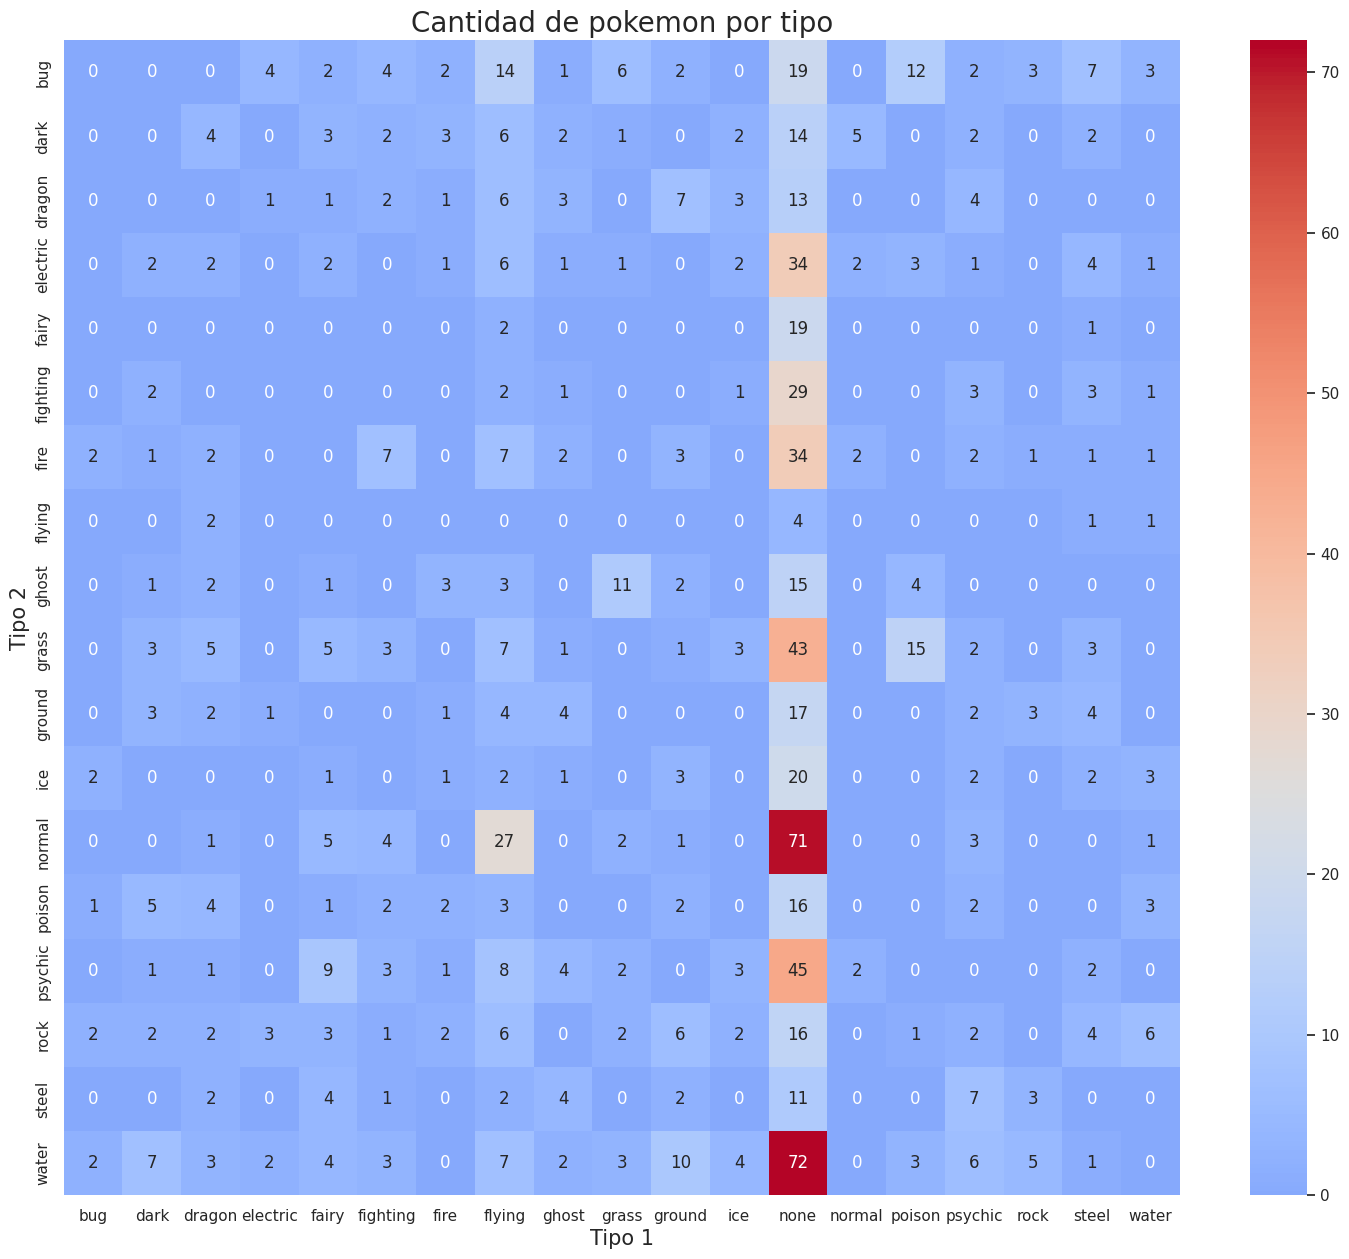

In [87]:
fig = plt.figure(figsize=(18,15))

g = sns.heatmap(contar_tipos,
                cmap='coolwarm',
                annot=True,
                center=25)

g.set_title('Cantidad de pokemon por tipo', fontsize=20)

g.set_xlabel('Tipo 1', fontsize=15)
g.set_ylabel('Tipo 2', fontsize=15)

plt.show()

## Cuantos Pokemon legendarios hay en cada generacion?

In [88]:
df[df['status'] == 'legendary']

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
193,150,Mewtwo,1,legendary,psychic,none,2.0,122.0,106,110,90,154,90,130,3.00,0.0
194,150,Mega Mewtwo X,1,legendary,psychic,fighting,2.3,127.0,106,190,100,154,100,130,3.00,0.0
195,150,Mega Mewtwo Y,1,legendary,psychic,none,1.5,33.0,106,150,70,194,120,140,3.00,0.0
302,249,Lugia,2,legendary,psychic,flying,5.2,216.0,106,90,130,90,154,110,3.00,0.0
303,250,Ho-oh,2,legendary,fire,flying,3.8,199.0,106,130,90,110,154,90,3.00,0.0
459,382,Kyogre,3,legendary,water,none,4.5,352.0,100,100,90,150,140,90,3.00,0.0
460,382,Primal Kyogre,3,legendary,water,none,9.8,430.0,100,150,90,180,160,90,5.00,0.0
461,383,Groudon,3,legendary,ground,none,3.5,950.0,100,150,140,100,90,90,3.00,0.0
462,383,Primal Groudon,3,legendary,ground,fire,5.0,999.7,100,180,160,150,90,90,5.00,0.0
463,384,Rayquaza,3,legendary,dragon,flying,7.0,206.5,105,150,90,150,90,95,45.00,0.0


In [89]:
df[df['status'] == 'legendary']['generation'].value_counts()

8    9
7    8
3    6
5    5
6    5
4    4
1    3
2    2
Name: generation, dtype: int64

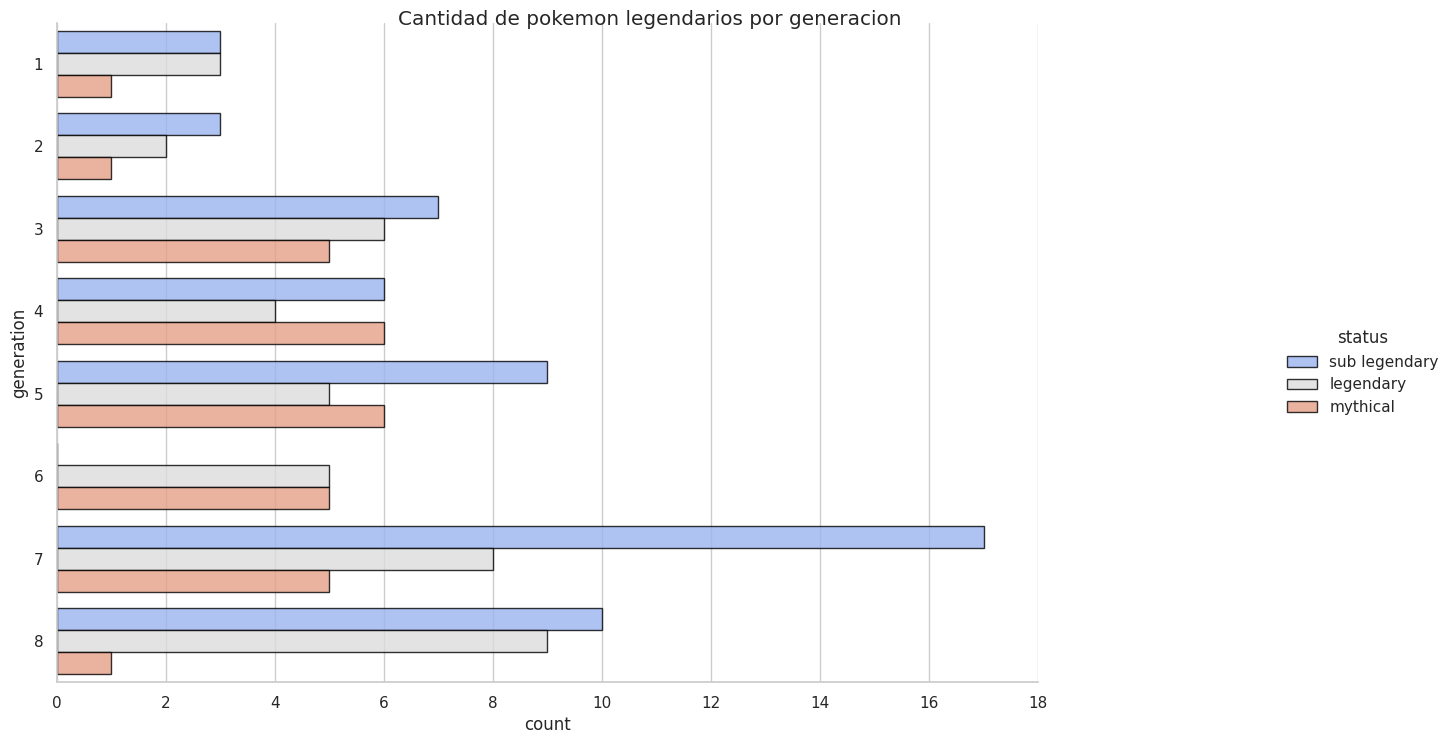

In [90]:
g = sns.catplot(data=df[df['status'] != 'normal'],
                y='generation',
                kind='count',
                edgecolor='black',
                hue='status',
                palette='coolwarm',
                alpha=0.8)

g.fig.set_size_inches(16,8)

g.set(xlim=(0, 18))

g.fig.suptitle('Cantidad de pokemon legendarios por generacion')

plt.show()

## Su podercambia generacion tras generacion?

In [91]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male'],
      dtype='object')

In [92]:
stat_columns = ['hp', 'attack', 'defense', 'sp_attack',
                'sp_defense', 'speed']

In [93]:
df['total'] = df[stat_columns].sum(axis=1)

In [94]:
df

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,total
0,1,Bulbasaur,1,normal,grass,poison,0.7,6.9,45,49,49,65,65,45,45.0,87.5,318
1,2,Ivysaur,1,normal,grass,poison,1.0,13.0,60,62,63,80,80,60,45.0,87.5,405
2,3,Venusaur,1,normal,grass,poison,2.0,100.0,80,82,83,100,100,80,45.0,87.5,525
3,3,Mega Venusaur,1,normal,grass,poison,2.4,155.5,80,100,123,122,120,80,45.0,87.5,625
4,4,Charmander,1,normal,fire,none,0.6,8.5,39,52,43,60,50,65,45.0,87.5,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,8,sub legendary,ice,none,2.2,800.0,100,145,130,65,110,30,3.0,0.0,580
1041,897,Spectrier,8,sub legendary,ghost,none,2.0,44.5,100,65,60,145,80,130,3.0,0.0,580
1042,898,Calyrex,8,legendary,psychic,grass,1.1,7.7,100,80,80,80,80,80,3.0,0.0,500
1043,898,Calyrex Ice Rider,8,legendary,psychic,ice,2.4,809.1,100,165,150,85,130,50,3.0,0.0,680


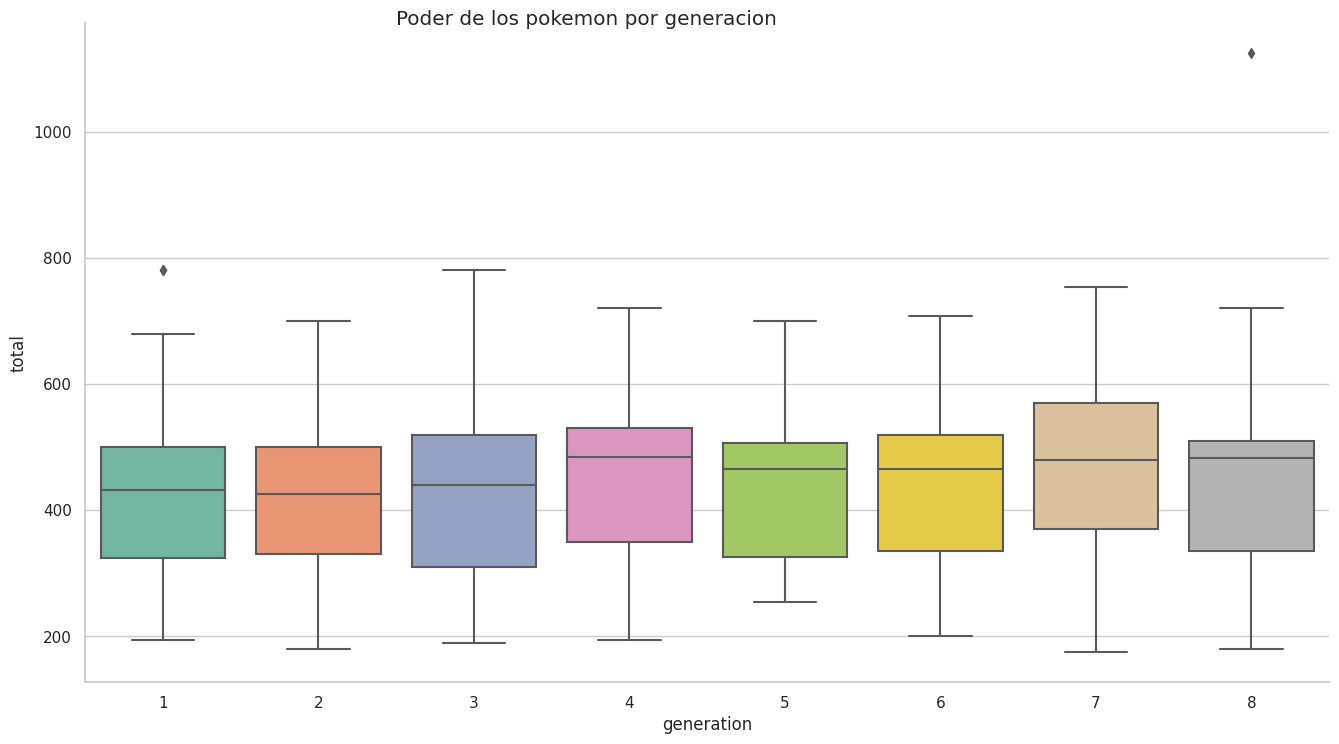

In [95]:
g = sns.catplot(data=df,
                x='generation',
                y='total',
                kind='box',
                palette='Set2')

g.fig.set_size_inches(16,8)

g.fig.suptitle('Poder de los pokemon por generacion')

plt.show()

## Cual es el tipo de Pokemon mas poderoso?

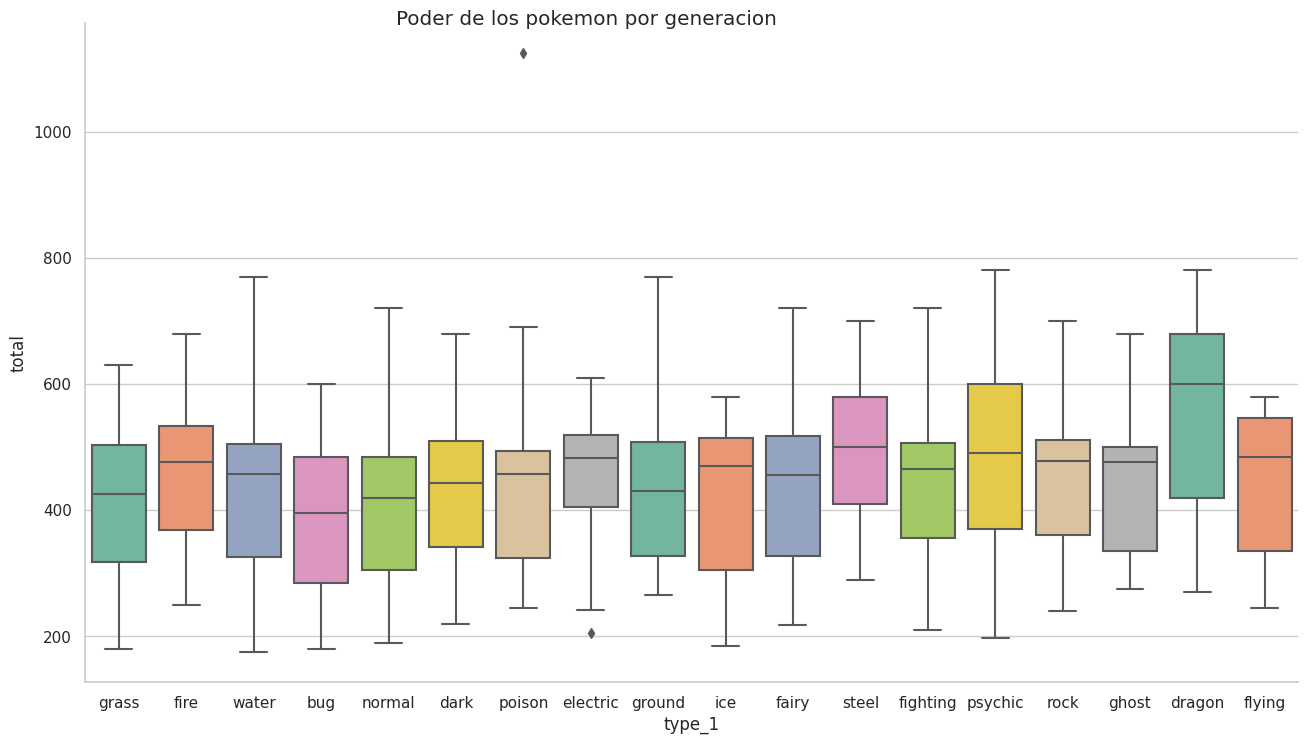

In [96]:
g = sns.catplot(data=df,
                x='type_1',
                y='total',
                kind='box',
                palette='Set2')

g.fig.set_size_inches(16,8)

# g.set(xlim=(0, 18))

g.fig.suptitle('Poder de los pokemon por generacion')

plt.show()

In [97]:
def stats_medios(tipo):
    stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
    
    return df.loc[df['type_1'] == tipo, stat_columns].mean()

In [98]:
tipo_agua = stats_medios('water')
tipo_fuego = stats_medios('fire')

In [99]:
def stats_pokemon(nombre):
    stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
    
    return df.loc[df['type_1'] == tipo, stat_columns].mean()

In [100]:
tipo_agua

hp            70.888060
attack        74.992537
defense       73.119403
sp_attack     75.007463
sp_defense    71.395522
speed         66.335821
dtype: float64

In [101]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=tipo_agua.values,
                              theta=tipo_agua.index,
                              name='water',
                              fill='toself'))

fig.add_trace(go.Scatterpolar(r=tipo_fuego.values,
                              theta=tipo_fuego.index,
                              name='fire',
                              fill='toself'))

fig.update_layout(showlegend=True,
                  polar={'radialaxis':{'visible':False}},
                  title='Grafica comparativa stats',)

fig.show()

In [102]:
def comparar_stats(df, lista_tipos):
    fig = go.Figure()
    
    for tipo in lista_tipos:
        
        stats = stats_medios(tipo)
        
        fig.add_trace(go.Scatterpolar(r=stats.values,
                                      theta=stats.index,
                                      name=tipo,
                                      fill='toself',
                                      opacity=0.5,
                                      hoveron='points',
                                      hovertemplate='%{theta}: %{r}'))
        
    fig.update_layout(showlegend=True,
                      polar={'radialaxis':{'visible':False}},
                      title='Grafica comparativa stats')
    
    fig.show()

In [103]:
tipos = ['water', 'fire', 'poison', 'dragon']

In [104]:
comparar_stats(df, tipos)

#### comparar Pokémons individuales!

In [105]:
def comparar_pokemons(dataframe, pokemon_list):
    
    stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']
    
    fig = go.Figure()
    
    for pokemon in pokemon_list:
        
        datos = dataframe[dataframe['name'] == pokemon][stat_columns].squeeze()
        valores = datos.values.tolist()
        columnas = datos.index.tolist()
        
        fig.add_trace(go.Scatterpolar(r= valores,
                                      theta= columnas,
                                      name=pokemon,
                                      fill='toself',
                                      hoverinfo= 'text+theta+name'))

    fig.update_layout(title=go.layout.Title(text='Comparacion Pokémon'),
                                            polar={'radialaxis': {'visible': False}},
                                            showlegend=True)
    
        
    fig.show()

In [106]:
pokemons = ['Rayquaza', 'Mimikyu', 'Pikachu']

comparar_pokemons(df, pokemons, 
                  #pokemon_colors
                  )

##### Incluso podemos incluir una diccionario de qué color corresponde a cada tipo y hacer que se muestren!

In [107]:
pokemon_colors = {'normal': '#A8A77A',
'fire': '#EE8130',
'water': '#6390F0',
'electric': '#F7D02C',
'grass': '#7AC74C',
'ice': '#96D9D6',
'fighting': '#C22E28',
'poison': '#A33EA1',
'ground': '#E2BF65',
'flying': '#A98FF3',
'psychic': '#F95587',
'bug': '#A6B91A',
'rock': '#B6A136',
'ghost': '#735797',
'dragon': '#6F35FC',
'dark': '#705746',
'steel': '#B7B7CE',
'fairy': '#D685AD'}

In [108]:
def comparar_pokemons(dataframe, pokemon_list):
    
    colors = {'normal': '#A8A77A',
                        'fire': '#EE8130',
                        'water': '#6390F0',
                        'electric': '#F7D02C',
                        'grass': '#7AC74C',
                        'ice': '#96D9D6',
                        'fighting': '#C22E28',
                        'poison': '#A33EA1',
                        'ground': '#E2BF65',
                        'flying': '#A98FF3',
                        'psychic': '#F95587',
                        'bug': '#A6B91A',
                        'rock': '#B6A136',
                        'ghost': '#735797',
                        'dragon': '#6F35FC',
                        'dark': '#705746',
                        'steel': '#B7B7CE',
                        'fairy': '#D685AD'}
    
    stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']
    
    fig = go.Figure()
    
    for pokemon in pokemon_list:
        
        datos = dataframe[dataframe['name'] == pokemon][stat_columns].squeeze()
        
        pokecolor = dataframe[dataframe['name'] == pokemon]['type_1'].squeeze()
        
        valores = datos.values.tolist()
        columnas = datos.index.tolist()
        
        fig.add_trace(go.Scatterpolar(r= valores,
                                      theta= columnas,
                                      name=pokemon,
                                      fill='toself',
                                      fillcolor = colors[pokecolor],
                                      marker_line_color = colors[pokecolor],
                                      opacity=0.7,
                                      hovertemplate = "%{theta}: %{r}",
                                      hoveron = "points", #"fills", "points+fills"
                                      ))
        
    fig.update_layout(title=go.layout.Title(text='Comparacion Pokémon por Stats'),
                                            polar={'radialaxis': {'visible': False}},
                                            showlegend=True)
    

    fig.show()

In [109]:
pokemons = ['Squirtle', 'Charmander', 'Bulbasaur']

comparar_pokemons(df, pokemons)

## Cuales son los pokemones mas grandes? Y mas pesados? Y menos densos?

### Mas altos

In [110]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,total
0,1,Bulbasaur,1,normal,grass,poison,0.7,6.9,45,49,49,65,65,45,45.0,87.5,318
1,2,Ivysaur,1,normal,grass,poison,1.0,13.0,60,62,63,80,80,60,45.0,87.5,405
2,3,Venusaur,1,normal,grass,poison,2.0,100.0,80,82,83,100,100,80,45.0,87.5,525
3,3,Mega Venusaur,1,normal,grass,poison,2.4,155.5,80,100,123,122,120,80,45.0,87.5,625
4,4,Charmander,1,normal,fire,none,0.6,8.5,39,52,43,60,50,65,45.0,87.5,309


In [111]:
mas_altos = df.sort_values(by='height_m', 
                           ascending=False)[['name', 'height_m']][:5].set_index('name')

In [112]:
mas_altos

,height_m
name,
Eternatus Eternamax,100.0
Eternatus,20.0
Wailord,14.5
Alolan Exeggutor,10.9
Mega Rayquaza,10.8


### Mas pesados

In [113]:
mas_pesados = df.sort_values(by='weight_kg', 
                             ascending=False)[['name', 'weight_kg']][:5].set_index('name')

In [114]:
mas_pesados

,weight_kg
name,
Celesteela,999.9
Cosmoem,999.9
Primal Groudon,999.7
Eternatus Eternamax,950.0
Groudon,950.0


### Menos densos

Y la densidad, no podemos calcularla, ya que disponemos de altura y peso, pero no disponemos de volumen, que es una medida tridimensional. Sin embargo, ya que sabemos la altura y el peso de nuestros pokémon, podemos calcular el BMI (Body Mass Index) o en castellano el Indice de Masa Corporal.

In [115]:
df['BMI'] = df['weight_kg'] / df['height_m']

In [116]:
df['BMI']

0         9.857143
1        13.000000
2        50.000000
3        64.791667
4        14.166667
           ...    
1040    363.636364
1041     22.250000
1042      7.000000
1043    337.125000
1044     22.333333
Name: BMI, Length: 1045, dtype: float64

In [117]:
bmi_mas_bajo = df.sort_values(by='BMI')[['name', 'BMI']][:5].set_index('name')

In [118]:
bmi_mas_bajo

,BMI
name,
Haunter,0.062500
Gastly,0.076923
Kartana,0.333333
Cursola,0.400000
Cosmog,0.500000


In [119]:
mas_pesados = mas_pesados.squeeze()
bmi_mas_bajo = bmi_mas_bajo.squeeze()
mas_altos = mas_altos.squeeze()

### Representandolos en una grafica

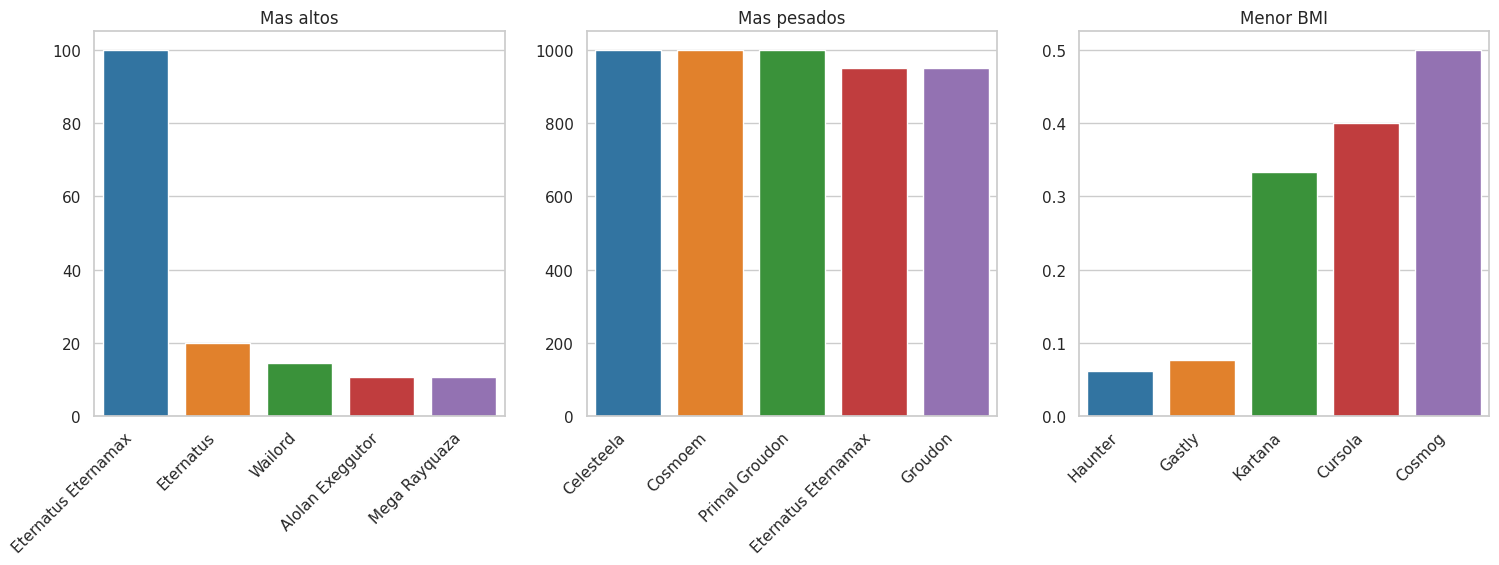

In [120]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(ax=ax1, 
            x=mas_altos.index, 
            y=mas_altos.values)

ax1.set_title('Mas altos')

ax1.set(xlabel=None)

ax1.set_xticklabels(mas_altos.index,
                    rotation=45,
                    horizontalalignment='right')


sns.barplot(ax=ax2, 
            x=mas_pesados.index, 
            y=mas_pesados.values)

ax2.set_title('Mas pesados')

ax2.set(xlabel=None)

ax2.set_xticklabels(mas_pesados.index,
                    rotation=45,
                    horizontalalignment='right')


sns.barplot(ax=ax3, 
            x=bmi_mas_bajo.index, 
            y=bmi_mas_bajo.values)


ax3.set_title('Menor BMI')

ax3.set(xlabel=None)

ax3.set_xticklabels(bmi_mas_bajo.index,
                    rotation=45,
                    horizontalalignment='right')

plt.show()

## Cuandos Pokemon son machos? Y hembras?

In [121]:
df['percentage_female'] = 100 - df['percentage_male']

In [122]:
df

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,total,BMI,percentage_female
0,1,Bulbasaur,1,normal,grass,poison,0.7,6.9,45,49,49,65,65,45,45.0,87.5,318,9.857143,12.5
1,2,Ivysaur,1,normal,grass,poison,1.0,13.0,60,62,63,80,80,60,45.0,87.5,405,13.000000,12.5
2,3,Venusaur,1,normal,grass,poison,2.0,100.0,80,82,83,100,100,80,45.0,87.5,525,50.000000,12.5
3,3,Mega Venusaur,1,normal,grass,poison,2.4,155.5,80,100,123,122,120,80,45.0,87.5,625,64.791667,12.5
4,4,Charmander,1,normal,fire,none,0.6,8.5,39,52,43,60,50,65,45.0,87.5,309,14.166667,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,8,sub legendary,ice,none,2.2,800.0,100,145,130,65,110,30,3.0,0.0,580,363.636364,100.0
1041,897,Spectrier,8,sub legendary,ghost,none,2.0,44.5,100,65,60,145,80,130,3.0,0.0,580,22.250000,100.0
1042,898,Calyrex,8,legendary,psychic,grass,1.1,7.7,100,80,80,80,80,80,3.0,0.0,500,7.000000,100.0
1043,898,Calyrex Ice Rider,8,legendary,psychic,ice,2.4,809.1,100,165,150,85,130,50,3.0,0.0,680,337.125000,100.0


### Visualizar

In [123]:
pokemon_hembra = df['percentage_female'].mean()
pokemon_macho = df['percentage_male'].mean()

In [124]:
pokemon_hembra

54.21052631578947

In [125]:
fig = px.pie(values=[pokemon_hembra, pokemon_macho],
             names=['Femeninos', 'Masculinos'], color_discrete_sequence=['#479B55', '#FA0087'])

fig.update_layout(title='% de pokemon por sexo')

fig.show()

## Que pokemon tienen mas ataque que defensa, y viceversa?

In [126]:
df.query('attack > defense').head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,total,BMI,percentage_female
4,4,Charmander,1,normal,fire,none,0.6,8.5,39,52,43,60,50,65,45.0,87.5,309,14.166667,12.5
5,5,Charmeleon,1,normal,fire,none,1.1,19.0,58,64,58,80,65,80,45.0,87.5,405,17.272727,12.5
6,6,Charizard,1,normal,fire,flying,1.7,90.5,78,84,78,109,85,100,45.0,87.5,534,53.235294,12.5
7,6,Mega Charizard X,1,normal,fire,dragon,1.7,110.5,78,130,111,130,85,100,45.0,87.5,634,65.000000,12.5
8,6,Mega Charizard Y,1,normal,fire,flying,1.7,100.5,78,104,78,159,115,100,45.0,87.5,634,59.117647,12.5


In [127]:
linea = pd.DataFrame(dict(x=[0,200],
                     y=[0,200]))

In [128]:
linea

,x,y
0,0,0
1,200,200


In [129]:
fig1 = px.scatter(df, 
                  x='defense',
                  y='attack',
                  hover_data=['name'],
                  color='type_1',
                  color_discrete_sequence=px.colors.qualitative.Dark24)


fig2 = px.line(linea, 
               x='x', 
               y='y')

fig2.update_traces(line_color='red')


fig3 = go.Figure(data=fig1.data + fig2.data)

fig3.update_layout(title='Pokemon por ataque/defensa',
                   xaxis_title = 'Defensa',
                   yaxis_title = 'Ataque')

fig3.show()

### Tendran relacion los valores de ataque y defensa?

In [130]:
!pip install statsmodels==0.13.2 ### ESte lo solicito Deepnote para correr las dos graficas que siguen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 127.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 51.0 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [131]:
fig1 = px.scatter(df, 
                  x='attack', 
                  y='defense', 
                  hover_data=['name'],
                  color_discrete_sequence=['#FA0087'], 
                  marginal_x='box', 
                  marginal_y='box', 
                  opacity=0.8, 
                  trendline='ols')


fig1.update_layout(title='Grafica de ataque/defensa con linea de tendencia general')

fig1.show()

In [132]:
fig2 = px.scatter(df, 
                  x='attack', 
                  y='defense',
                  hover_data=['name'],
                  color='type_1',
                  color_discrete_sequence=px.colors.qualitative.Light24, 
                  marginal_x='box', 
                  marginal_y='box', 
                  opacity=0.8, 
                  trendline='ols')


fig2.update_layout(title='Grafica de ataque/defensa con linea de tendencia por tipo')

fig2.show()

Podemos apreciar que hay cierta relacion entre estos dos valores, y que cuando un pokemon tiene alto uno de estos stats el otro tambien. Siendo que cuando un pokemon es debil en defensa suele ser debil en ataque, y viceversa.

# Bonus! Si tienes curiosidad, y quieres contestar más preguntas, puedes resolverlas aquí mismo!

## Análisis de correlación entre variables
Ya que conociste el comportamiento esencial de las características  es momento de conocer cómo se relacionan entre sí para descubrir si alguna(s) pueden afectar a otras variables.

### Creacion de una matriz de correlación de las variables numéricas del dataset.

In [133]:
columns_corr_high = ['hp', 'attack', 'defense',
                     'sp_attack', 'sp_defense', 
                     'speed', 'catch_rate', 
                     'height_m', 'weight_kg', 'BMI',]

df[columns_corr_high].corr(method ='pearson').style.background_gradient(cmap = 'coolwarm', axis=None) 

,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,height_m,weight_kg,BMI
hp,1.000000,0.443752,0.299977,0.371185,0.392835,0.189705,-0.465417,0.374797,0.464228,0.018381
attack,0.443752,1.000000,0.456565,0.369529,0.266685,0.373712,-0.527073,0.205505,0.424586,0.007957
defense,0.299977,0.456565,1.000000,0.222737,0.544896,0.004664,-0.440089,0.305927,0.488192,0.122149
sp_attack,0.371185,0.369529,0.222737,1.000000,0.510727,0.445268,-0.531788,0.202550,0.241461,-0.024776
sp_defense,0.392835,0.266685,0.544896,0.510727,1.000000,0.226562,-0.513339,0.308383,0.329843,0.097829
speed,0.189705,0.373712,0.004664,0.445268,0.226562,1.000000,-0.417459,0.137067,0.060846,-0.039430
catch_rate,-0.465417,-0.527073,-0.440089,-0.531788,-0.513339,-0.417459,1.000000,-0.152492,-0.292819,-0.059569
height_m,0.374797,0.205505,0.305927,0.202550,0.308383,0.137067,-0.152492,1.000000,0.446076,0.001849
weight_kg,0.464228,0.424586,0.488192,0.241461,0.329843,0.060846,-0.292819,0.446076,1.000000,0.320687
BMI,0.018381,0.007957,0.122149,-0.024776,0.097829,-0.039430,-0.059569,0.001849,0.320687,1.000000


### Creacion de una gráfica tipo heatmap para observar mejor las correlaciones entre variables.


In [134]:
fig1 = px.imshow(df[columns_corr_high].corr(), 
                 color_continuous_scale='Portland')

fig1.update_layout(title = 'Heatmaps de correlacion de nuestro dataset por metodo Pearson')

fig1.show()

### Tabla con los valores de correlación de cada variable con la variable weight_kg.

In [135]:
df[columns_corr_high].corr()[['weight_kg']].sort_values(by='weight_kg', ascending=False).style.background_gradient(cmap = 'coolwarm',axis=None)

,weight_kg
weight_kg,1.000000
defense,0.488192
hp,0.464228
height_m,0.446076
attack,0.424586
sp_defense,0.329843
BMI,0.320687
sp_attack,0.241461
speed,0.060846
catch_rate,-0.292819


In [136]:
fig1 = px.violin(df, 
                 x='type_1', 
                 y='weight_kg', 
                 color = 'type_1', 
                 box=True, 
                 points="all", 
                 hover_data=df.columns, 
                 color_discrete_sequence=px.colors.qualitative.Light24)

fig1.update_layout(title = 'Grafica para determionar efecto de la variable peso en el tipo de pokemon')

fig1.show()

Es curioso como los tipo metal, tienen a los pokemon mas pesados y aun mas sorprente es que existan tipo fantasma que sean muy pesados.

# Felicidades!! 

Con esto hemos acabado el proyecto final del curso de introduccion al analisis de datos de la academia Mastermind.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d7c5fd95-7b78-43ee-8bac-dfafdd1bd85a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>